# Recomendação - Estudantes que necessitam de atenção
Com base nos registros de acesso às questões, por meio de algoritmo de Filtragem Baseada em Conhecimento, nas abordagens de restrições e de casos, identificar os estudantes que não atingem notas esperadas. 
Verificar estudantes que estão entediados? pouco engajamento?

In [ ]:
#### Ideia, buscar o baixo engajamento nas atividades? Usando informação temporal

In [1]:
import pandas as pd

kt1 = pd.read_csv(r'D:\Doutorado\USP\SCC5966 - Recomendaçao\Projeto\dataset\compacto\kt1.txt',sep='\t')
kt2 = pd.read_csv(r'D:\Doutorado\USP\SCC5966 - Recomendaçao\Projeto\dataset\compacto\kt2.txt',sep='\t')
kt3 = pd.read_csv(r'D:\Doutorado\USP\SCC5966 - Recomendaçao\Projeto\dataset\compacto\kt3.txt',sep='\t')
kt4 = pd.read_csv(r'D:\Doutorado\USP\SCC5966 - Recomendaçao\Projeto\dataset\compacto\kt4.txt',sep='\t')

In [3]:
kt4.head()

,Unnamed: 0,timestamp,action_type,item_id,cursor_time,source,user_answer,platform,codigo_arquivo,usuario
0,0,1565651017866,pay,p130,NaN,NaN,NaN,NaN,u5.csv,u5
1,1,1566532547478,enter,b5298,NaN,my_note,NaN,web,u5.csv,u5
2,2,1566532582693,respond,q7242,NaN,my_note,a,web,u5.csv,u5
3,3,1566532645820,respond,q7243,NaN,my_note,a,web,u5.csv,u5
4,4,1566532707773,respond,q7244,NaN,my_note,a,web,u5.csv,u5


In [15]:
# Removendo automaticamente as colunas 'Unnamed'
data = kt4.loc[:, ~kt4.columns.str.contains('^Unnamed')].copy()

In [17]:
data.head()

,timestamp,action_type,item_id,cursor_time,source,user_answer,platform,codigo_arquivo,usuario
0,1565651017866,pay,p130,NaN,NaN,NaN,NaN,u5.csv,u5
1,1566532547478,enter,b5298,NaN,my_note,NaN,web,u5.csv,u5
2,1566532582693,respond,q7242,NaN,my_note,a,web,u5.csv,u5
3,1566532645820,respond,q7243,NaN,my_note,a,web,u5.csv,u5
4,1566532707773,respond,q7244,NaN,my_note,a,web,u5.csv,u5


<Axes: xlabel='lecture_id', ylabel='tags'>

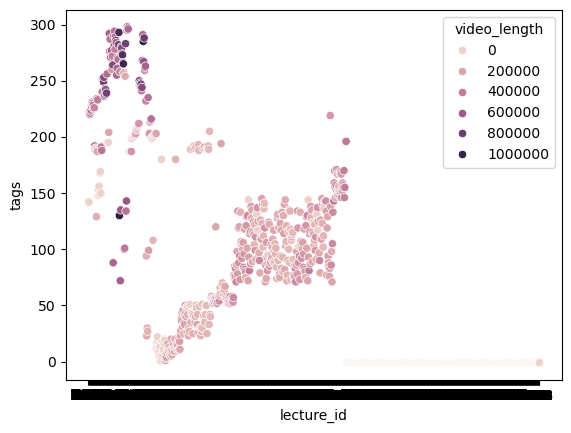

In [7]:
import seaborn as sns

sns.scatterplot(data = lectures, x = 'lecture_id', y = 'tags', hue = 'video_length')

In [19]:
import pandas as pd

# Convertendo o timestamp para um tipo numérico (se necessário)
data["timestamp"] = pd.to_numeric(data["timestamp"])

# Filtrar apenas ações relevantes (enter, play, pause, quit)
filtered_actions = ["enter", "play", "pause", "quit"]
df_filtered = data[data["action_type"].isin(filtered_actions)]

# Ordenar os dados por usuário, item_id e timestamp
df_filtered = df_filtered.sort_values(by=["usuario", "item_id", "timestamp"])

# Criar uma função para calcular o tempo gasto em cada item_id
def calculate_time(group):
    group = group.sort_values(by="timestamp")  # Ordenar por timestamp
    group["time_diff"] = group["timestamp"].diff()  # Diferença de tempo entre ações
    total_time = group["time_diff"].sum()  # Tempo total gasto
    return pd.DataFrame({
        "usuario": [group["usuario"].iloc[0]],
        "item_id": [group["item_id"].iloc[0]],
        "total_time_spent": [total_time]
    })

# Agrupar por usuário e item_id e aplicar a função
tempo_itens = df_filtered.groupby(["usuario", "item_id"]).apply(calculate_time).reset_index(drop=True)

# Exibir o resultado final
print(tempo_itens)


C:\Users\talit\AppData\Local\Temp\ipykernel_9552\1564663703.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tempo_itens = df_filtered.groupby(["usuario", "item_id"]).apply(calculate_time).reset_index(drop=True)


       usuario item_id  total_time_spent
0        u1000      b1               0.0
1        u1000    b100               0.0
2        u1000   b1013               0.0
3        u1000   b1019               0.0
4        u1000   b1029               0.0
...        ...     ...               ...
734263    u998    l629          284630.0
734264    u998     l64          199567.0
734265    u998    l719          478096.0
734266    u998    l784          179132.0
734267    u998    l812           81689.0

[734268 rows x 3 columns]


In [21]:
tempo_itens.to_csv('D:/Doutorado/USP/SCC5966 - Recomendaçao/Projeto/dataset/dados_treinamento/tempo_itens.txt', sep='\t', index=True)

In [24]:
tempo_itens.head()

,usuario,item_id,total_time_spent
0,u1000,b1,0.0
1,u1000,b100,0.0
2,u1000,b1013,0.0
3,u1000,b1019,0.0
4,u1000,b1029,0.0
